### MULTICLASS CLASSIFICATION FOR METAL, CLASSICAL, BLUES AND HIPHOP MUSIC GENRES


* First of all, let's import every library and our config.py and functions.py files to the notebook.

In [4]:
%matplotlib inline
import itertools
import numpy, scipy, matplotlib.pyplot as plt, pandas, librosa,sklearn
import config, functions

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

* We obtain the data only for Metal, Classical, Blues and Hiphop music from our dataset.

In [5]:
data_set=pandas.read_csv('data_set.csv',index_col=False)
data_set=pandas.concat((data_set[600:700],data_set[100:200],data_set[400:500],data_set[0:100]),ignore_index=True)
GENRES=config.Genre4.GENRE_NAMES

number_of_rows,number_of_cols = data_set.shape
data_set[:5].style

* Let's split our dataset, %70 for training and %30 for test.
* Then we seperate both train and test datasets into two part. One for feature columns, one for class column.

In [6]:
from sklearn.model_selection import train_test_split

data_set_values=numpy.array(data_set)

train, test = train_test_split(data_set_values, test_size = config.Genre4.TEST_SIZE,random_state=2,
                              stratify=data_set_values[:,number_of_cols-1])

train_x=train[:,:number_of_cols-1]
train_y=train[:,number_of_cols-1]

test_x=test[:,:number_of_cols-1]
test_y=test[:,number_of_cols-1]

print("Training data size: {}".format(train.shape))
print("Test data size: {}".format(test.shape))

Training data size: (280, 37)
Test data size: (120, 37)


* We use several machine learning algorithms to make classification.
 - **Algorithms used:**
   - K-Neares Neighbor
   - Random Forest
   - Support Vector Machine
   - Neural Network

* Application of KNN algorithm and its performance analysis

Max Accuracy is 0.908 on test dataset with 3 neighbors.

Training Score: 0.929
Test score: 0.908
---------------PERFORMANCE ANALYSIS FOR THE MODEL----------------

Real Test dataset labels: 
['B' 'H' 'M' 'B' 'M' 'Cl' 'H' 'M' 'B' 'M' 'M' 'B' 'Cl' 'H' 'B' 'Cl' 'Cl'
 'B' 'M' 'Cl' 'H' 'B' 'Cl' 'Cl' 'Cl' 'M' 'M' 'Cl' 'Cl' 'Cl' 'Cl' 'B' 'M'
 'H' 'Cl' 'Cl' 'B' 'B' 'H' 'H' 'Cl' 'M' 'M' 'B' 'B' 'H' 'H' 'H' 'M' 'B' 'B'
 'H' 'M' 'B' 'M' 'Cl' 'H' 'M' 'H' 'M' 'H' 'Cl' 'M' 'Cl' 'M' 'B' 'Cl' 'M'
 'M' 'Cl' 'M' 'Cl' 'H' 'B' 'M' 'Cl' 'H' 'M' 'H' 'B' 'M' 'H' 'H' 'H' 'B' 'M'
 'B' 'H' 'H' 'Cl' 'M' 'Cl' 'B' 'Cl' 'H' 'H' 'B' 'Cl' 'B' 'M' 'Cl' 'H' 'H'
 'H' 'B' 'H' 'B' 'M' 'Cl' 'H' 'B' 'M' 'H' 'Cl' 'B' 'Cl' 'B' 'B' 'M' 'B']

Predicted Test dataset labels: 
['B' 'H' 'M' 'B' 'M' 'Cl' 'H' 'M' 'B' 'M' 'B' 'B' 'Cl' 'H' 'B' 'Cl' 'Cl'
 'B' 'H' 'Cl' 'H' 'B' 'Cl' 'Cl' 'Cl' 'M' 'M' 'Cl' 'Cl' 'Cl' 'Cl' 'H' 'M'
 'H' 'Cl' 'Cl' 'B' 'B' 'H' 'H' 'Cl' 'M' 'M' 'B' 'B' 'H' 'H' 'H' 'M' 'B' 'B'
 'H' 'H' 'B' 'M' 'Cl' 'H' 'H' 'H' 'M

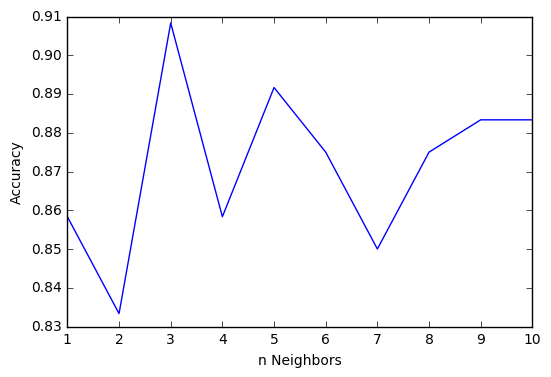

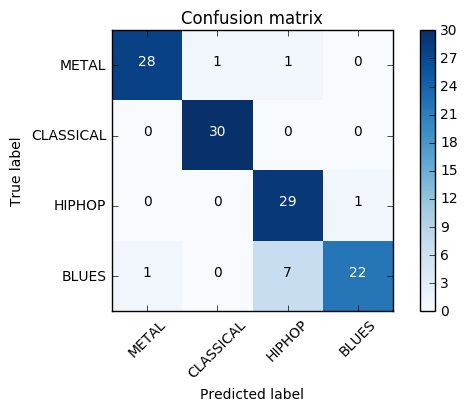

In [7]:
results_knn=[]
for i in range(1,11):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x,train_y)
    results_knn.append(knn.score(test_x,test_y))
    
max_accuracy_knn=max(results_knn)
best_k=1+results_knn.index(max(results_knn))
print("Max Accuracy is {:.3f} on test dataset with {} neighbors.\n".format(max_accuracy_knn,best_k))

plt.plot(numpy.arange(1,11),results_knn)
plt.xlabel("n Neighbors")
plt.ylabel("Accuracy")


knn=KNeighborsClassifier(n_neighbors=best_k)
knn.fit(train_x,train_y)
print("Training Score: {:.3f}".format(knn.score(train_x,train_y)))
print("Test score: {:.3f}".format(knn.score(test_x,test_y)))  

functions.plot_cnf(knn,test_x,test_y,GENRES)

* Application of Random Forest algorithm and its performance analysis

Max Accuracy is 0.933 on test dataset with 14 estimators.

Training Score: 0.996
Test score: 0.933
---------------PERFORMANCE ANALYSIS FOR THE MODEL----------------

Real Test dataset labels: 
['B' 'H' 'M' 'B' 'M' 'Cl' 'H' 'M' 'B' 'M' 'M' 'B' 'Cl' 'H' 'B' 'Cl' 'Cl'
 'B' 'M' 'Cl' 'H' 'B' 'Cl' 'Cl' 'Cl' 'M' 'M' 'Cl' 'Cl' 'Cl' 'Cl' 'B' 'M'
 'H' 'Cl' 'Cl' 'B' 'B' 'H' 'H' 'Cl' 'M' 'M' 'B' 'B' 'H' 'H' 'H' 'M' 'B' 'B'
 'H' 'M' 'B' 'M' 'Cl' 'H' 'M' 'H' 'M' 'H' 'Cl' 'M' 'Cl' 'M' 'B' 'Cl' 'M'
 'M' 'Cl' 'M' 'Cl' 'H' 'B' 'M' 'Cl' 'H' 'M' 'H' 'B' 'M' 'H' 'H' 'H' 'B' 'M'
 'B' 'H' 'H' 'Cl' 'M' 'Cl' 'B' 'Cl' 'H' 'H' 'B' 'Cl' 'B' 'M' 'Cl' 'H' 'H'
 'H' 'B' 'H' 'B' 'M' 'Cl' 'H' 'B' 'M' 'H' 'Cl' 'B' 'Cl' 'B' 'B' 'M' 'B']

Predicted Test dataset labels: 
['B' 'H' 'M' 'B' 'M' 'Cl' 'H' 'M' 'B' 'M' 'M' 'B' 'Cl' 'H' 'B' 'Cl' 'B' 'B'
 'H' 'Cl' 'H' 'B' 'Cl' 'Cl' 'Cl' 'M' 'M' 'Cl' 'Cl' 'Cl' 'Cl' 'H' 'M' 'H'
 'Cl' 'Cl' 'B' 'B' 'H' 'H' 'Cl' 'M' 'M' 'B' 'B' 'H' 'H' 'H' 'M' 'B' 'B' 'H'
 'M' 'B' 'M' 'Cl' 'H' 'M' 'H' '

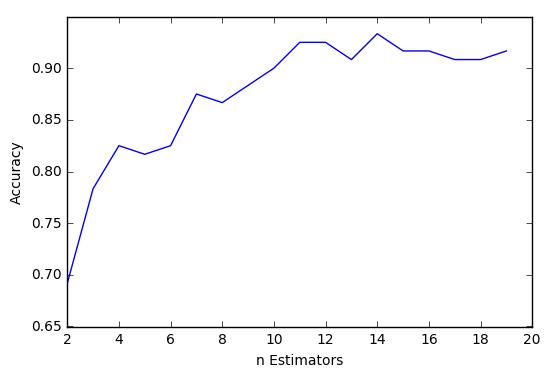

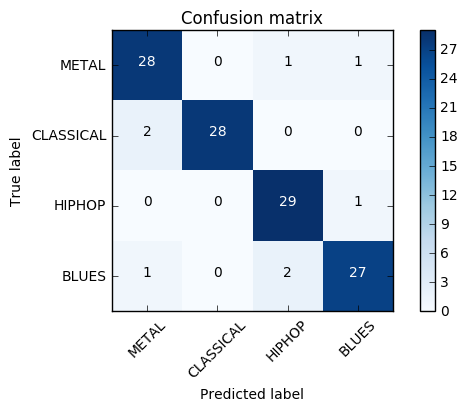

In [8]:
results_forest=[]
for i in range(2,20):
    forest=RandomForestClassifier(random_state=42,n_estimators=i)
    forest.fit(train_x,train_y)
    results_forest.append(forest.score(test_x,test_y))
    
max_accuracy_forest=max(results_forest)
best_n_est=2+results_forest.index(max(results_forest))
print("Max Accuracy is {:.3f} on test dataset with {} estimators.\n".format(max_accuracy_forest,best_n_est))

plt.plot(numpy.arange(2,20),results_forest)
plt.xlabel("n Estimators")
plt.ylabel("Accuracy")


forest=RandomForestClassifier(random_state=42,n_estimators=best_n_est)
forest.fit(train_x,train_y)
print("Training Score: {:.3f}".format(forest.score(train_x,train_y)))
print("Test score: {:.3f}".format(forest.score(test_x,test_y)))

functions.plot_cnf(forest,test_x,test_y,GENRES)

* Application of SVM algorithm and its performance analysis

Training Score: 0.989
Test score: 0.958
---------------PERFORMANCE ANALYSIS FOR THE MODEL----------------

Real Test dataset labels: 
['B' 'H' 'M' 'B' 'M' 'Cl' 'H' 'M' 'B' 'M' 'M' 'B' 'Cl' 'H' 'B' 'Cl' 'Cl'
 'B' 'M' 'Cl' 'H' 'B' 'Cl' 'Cl' 'Cl' 'M' 'M' 'Cl' 'Cl' 'Cl' 'Cl' 'B' 'M'
 'H' 'Cl' 'Cl' 'B' 'B' 'H' 'H' 'Cl' 'M' 'M' 'B' 'B' 'H' 'H' 'H' 'M' 'B' 'B'
 'H' 'M' 'B' 'M' 'Cl' 'H' 'M' 'H' 'M' 'H' 'Cl' 'M' 'Cl' 'M' 'B' 'Cl' 'M'
 'M' 'Cl' 'M' 'Cl' 'H' 'B' 'M' 'Cl' 'H' 'M' 'H' 'B' 'M' 'H' 'H' 'H' 'B' 'M'
 'B' 'H' 'H' 'Cl' 'M' 'Cl' 'B' 'Cl' 'H' 'H' 'B' 'Cl' 'B' 'M' 'Cl' 'H' 'H'
 'H' 'B' 'H' 'B' 'M' 'Cl' 'H' 'B' 'M' 'H' 'Cl' 'B' 'Cl' 'B' 'B' 'M' 'B']

Predicted Test dataset labels: 
['B' 'H' 'M' 'B' 'M' 'Cl' 'H' 'M' 'B' 'M' 'M' 'B' 'Cl' 'H' 'B' 'Cl' 'Cl'
 'B' 'H' 'Cl' 'H' 'B' 'Cl' 'Cl' 'Cl' 'M' 'M' 'Cl' 'Cl' 'Cl' 'Cl' 'H' 'M'
 'H' 'Cl' 'Cl' 'B' 'B' 'H' 'H' 'Cl' 'M' 'M' 'Cl' 'B' 'H' 'H' 'H' 'M' 'B'
 'B' 'H' 'M' 'B' 'M' 'Cl' 'H' 'M' 'H' 'M' 'H' 'Cl' 'M' 'Cl' 'M' 'B' 'Cl'
 'H' 'M' 'Cl' 'M' 'Cl' 

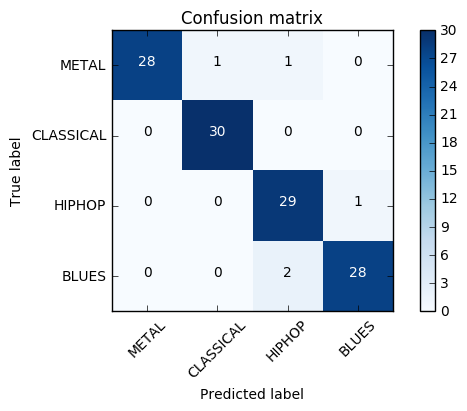

In [9]:
svm=SVC(C=100)
svm.fit(train_x,train_y)
print("Training Score: {:.3f}".format(svm.score(train_x,train_y)))
print("Test score: {:.3f}".format(svm.score(test_x,test_y)))

functions.plot_cnf(svm,test_x,test_y,GENRES)

* Application of KNN algorithm and its performance analysis

Training Score: 0.979
Test score: 0.933
---------------PERFORMANCE ANALYSIS FOR THE MODEL----------------

Real Test dataset labels: 
['B' 'H' 'M' 'B' 'M' 'Cl' 'H' 'M' 'B' 'M' 'M' 'B' 'Cl' 'H' 'B' 'Cl' 'Cl'
 'B' 'M' 'Cl' 'H' 'B' 'Cl' 'Cl' 'Cl' 'M' 'M' 'Cl' 'Cl' 'Cl' 'Cl' 'B' 'M'
 'H' 'Cl' 'Cl' 'B' 'B' 'H' 'H' 'Cl' 'M' 'M' 'B' 'B' 'H' 'H' 'H' 'M' 'B' 'B'
 'H' 'M' 'B' 'M' 'Cl' 'H' 'M' 'H' 'M' 'H' 'Cl' 'M' 'Cl' 'M' 'B' 'Cl' 'M'
 'M' 'Cl' 'M' 'Cl' 'H' 'B' 'M' 'Cl' 'H' 'M' 'H' 'B' 'M' 'H' 'H' 'H' 'B' 'M'
 'B' 'H' 'H' 'Cl' 'M' 'Cl' 'B' 'Cl' 'H' 'H' 'B' 'Cl' 'B' 'M' 'Cl' 'H' 'H'
 'H' 'B' 'H' 'B' 'M' 'Cl' 'H' 'B' 'M' 'H' 'Cl' 'B' 'Cl' 'B' 'B' 'M' 'B']

Predicted Test dataset labels: 
['B' 'H' 'M' 'B' 'M' 'Cl' 'H' 'M' 'B' 'M' 'B' 'B' 'Cl' 'H' 'B' 'Cl' 'Cl'
 'B' 'H' 'Cl' 'H' 'B' 'Cl' 'Cl' 'Cl' 'M' 'M' 'Cl' 'Cl' 'Cl' 'Cl' 'H' 'M'
 'H' 'Cl' 'Cl' 'B' 'B' 'H' 'H' 'Cl' 'M' 'M' 'Cl' 'B' 'H' 'H' 'H' 'M' 'B'
 'B' 'H' 'M' 'B' 'M' 'Cl' 'H' 'H' 'H' 'M' 'H' 'Cl' 'M' 'Cl' 'M' 'B' 'Cl'
 'H' 'M' 'Cl' 'M' 'Cl' 

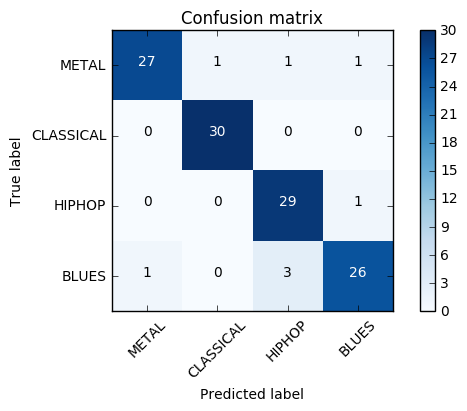

In [10]:
neural=MLPClassifier(max_iter=400,random_state=62,hidden_layer_sizes=[40,40])
neural.fit(train_x,train_y)
print("Training Score: {:.3f}".format(neural.score(train_x,train_y)))
print("Test score: {:.3f}".format(neural.score(test_x,test_y)))

functions.plot_cnf(neural,test_x,test_y,GENRES)